This is a test notebook for these kernels classifiers.

In [82]:
from KFDA import Fisher_discriminant
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [83]:
class plot_data():
    def __init__(self, x_min, y_min, x_max, y_max, size):
        
        # limit of x-axis
        self.x_min, self.x_max = x_min, x_max

        # limit of y-axis
        self.y_min, self.y_max = y_min, y_max

        # size of the figure
        self.size = size

        if not isinstance(size, tuple):
            raise ValueError("The size should be a tuple of two ints")

    def plot_binary_class(self, X, Y):
        """
        X : float(nb_sample, n_dim = 2) stores the coordinates of the points.
        Y : bool(nb_sample) stores the labels
        """
        fig, ax = plt.subplots(1,1,figsize = self.size)
        class_1 = X[Y == 0]
        class_2 = X[Y == 1]
        ax.scatter(class_1[:,0], class_1[:,1], color = 'r')
        ax.scatter(class_2[:,0], class_2[:,1], color = 'b')
        ax.set_xlim(self.x_min, self.x_max)
        ax.set_ylim(self.y_min, self.y_max)

In [84]:
class gaussian_kernel:
    def __init__(self, sigma):
        self.sigma = sigma
    def kernel(self, X):
        """
        X: float(nb_sample, 2)
        sigma: float. It is the bandwidth of the kernel
        """
        diff = X[None,:,:] - X[:,None,:]
        return np.exp(-np.sum(diff**2)/(2*self.sigma))

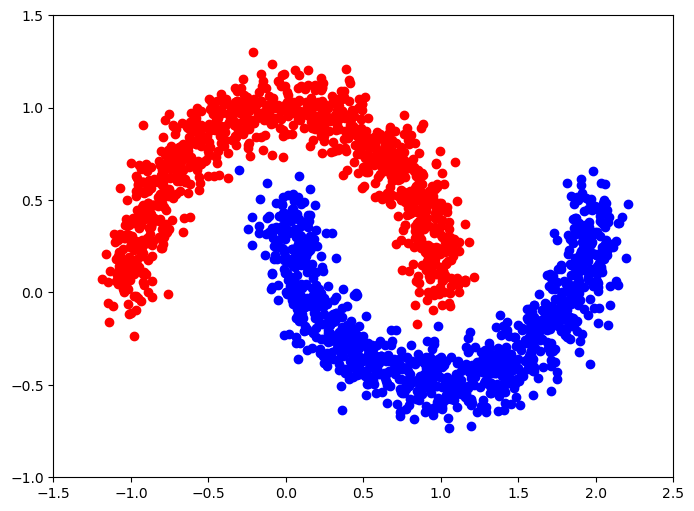

In [85]:
X, Y = make_moons(n_samples=2000, noise=0.1)

x_min, x_max = -1.5, 2.5
y_min, y_max = -1, 1.5

plot = plot_data(x_min, y_min, x_max, y_max, size = (8,6))
plot.plot_binary_class(X,Y)

In [86]:
g_kernel = gaussian_kernel(1/2)

Kernel_Fisher = Fisher_discriminant(kernel = g_kernel.kernel, nb_class = 2)

Kernel_Fisher.fit(X,Y)

NameError: name 'np' is not defined